In [9]:
from sklearn.datasets import make_classification, make_moons, make_circles
import matplotlib.pyplot as plt
import numpy as np

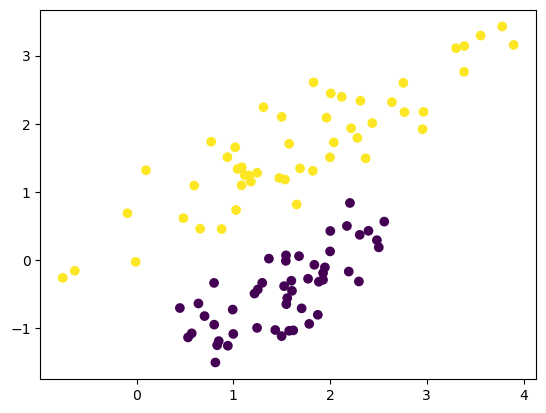

In [32]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X += 1.2 * np.random.uniform(size=X.shape)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

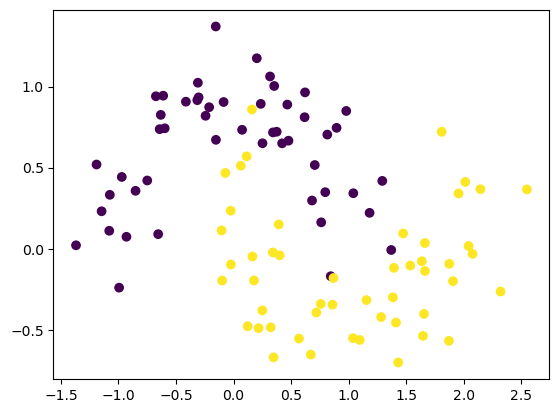

In [8]:
X, y = make_moons(noise=0.2, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

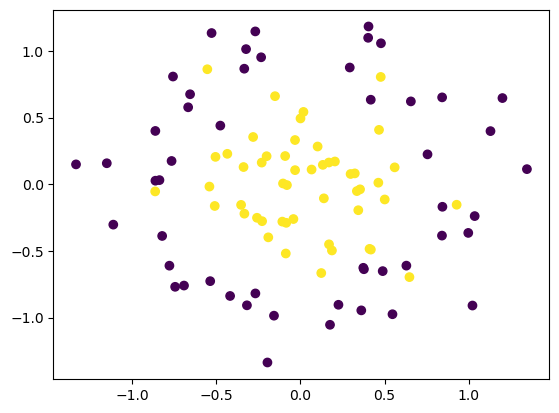

In [16]:
X, y = make_circles(noise=0.2, factor=0.4, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

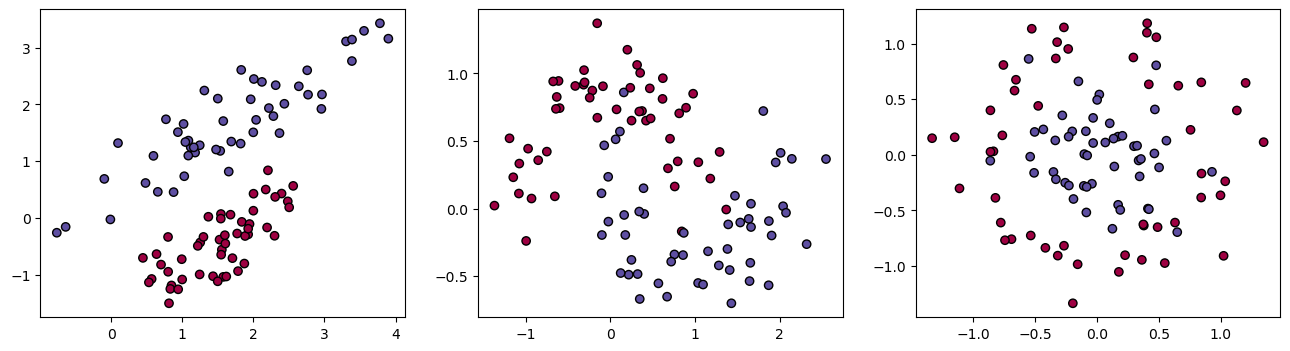

In [33]:
datasets = [
    (X, y),
    make_moons(noise=0.2, random_state=42),
    make_circles(noise=0.2, factor=0.4, random_state=42),
]

fig, axs = plt.subplots(1, 3, figsize=(16, 4))

for ax, (X, y) in zip(axs, datasets):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='black')

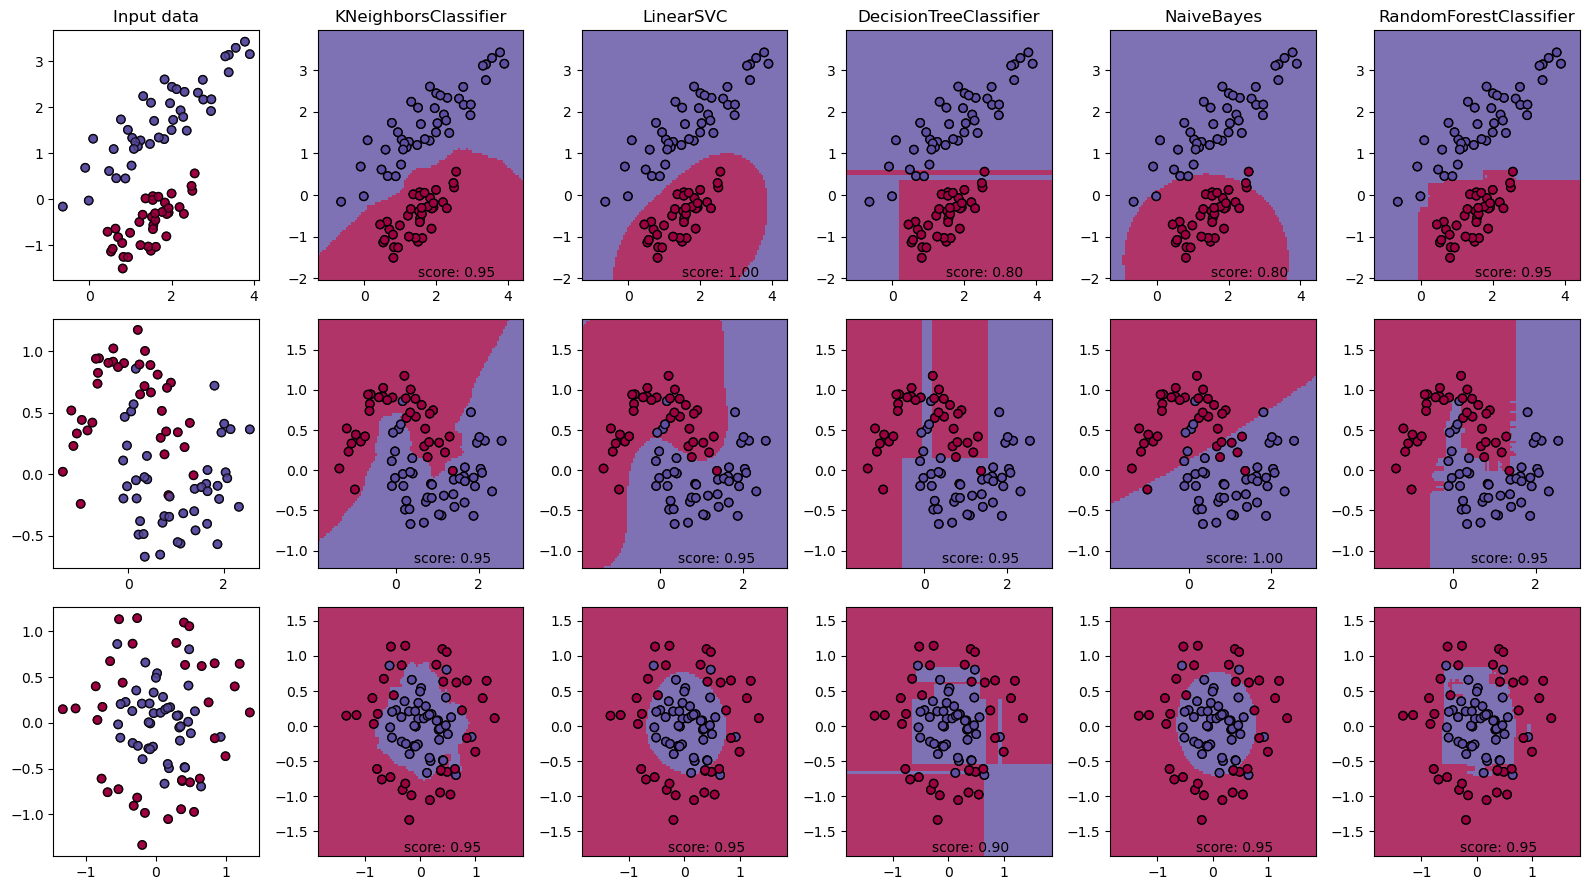

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.inspection import DecisionBoundaryDisplay

names = ["KNeighborsClassifier", "LinearSVC", "DecisionTreeClassifier", "NaiveBayes", "RandomForestClassifier"]

classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),   
    GaussianNB(),
    RandomForestClassifier()
]

fig = plt.figure(figsize=(16, 9))
i = 1

for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")

    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral, edgecolors='black')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral, edgecolors='black', alpha=0.6)
    i += 1

    for name, classifier in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), classifier)
        clf.fit(X_train, y_train)

        score = clf.score(X_test, y_test)

        DecisionBoundaryDisplay.from_estimator(
            clf,
            X,
            response_method="predict",
            ax=ax,
            plot_method="pcolormesh",
            cmap=plt.cm.Spectral,
            alpha=0.8,
            eps=0.5,
        )

        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral, edgecolors='black')
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral, edgecolors='black')

        if ds_cnt == 0:
            ax.set_title(name)
        
        ax.text(X[:, 0].max() - 0.25,
                X[:, 1].min() - 0.45,
                f"score: {score:.2f}",
                size=10,
                ha="right")
        i += 1
        
plt.tight_layout()
plt.show()


